# Introduction to Scikit-Learn
Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities

# Normal plot for the Equations - 1

# importing libraries

In [1]:

import matplotlib.pyplot as plt


In [2]:
x=[i for i in range(10)]

x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [3]:
y=[2+3*i for i in range(10)]
y

[2, 5, 8, 11, 14, 17, 20, 23, 26, 29]

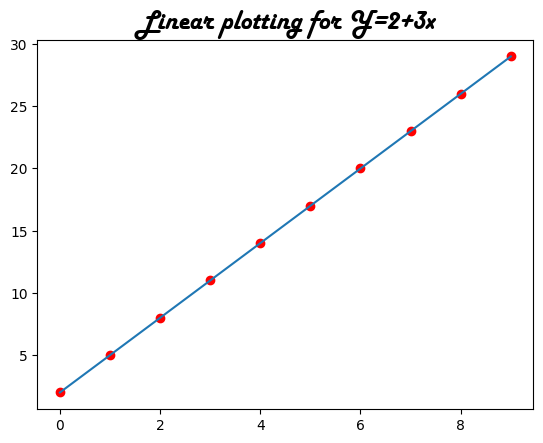

In [4]:
plt.title("Linear plotting for Y=2+3x",fontname='Harlow Solid Italic',fontsize=20)
plt.scatter(x,y,color='red')
plt.plot(x,y)

# 1 - End

# train model - 2


In [ ]:
# Dont run it
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import os
import joblib

X = []
y = []

scaler = StandardScaler()

for j in range(9):
    files = os.listdir()
    len_f = len(files)
    for i in range(len_f):
        img = Image.open('{}{}'.format(j, files[i]))
        data = np.array(list(img.getdata())) / 255
        X.append(data.tolist())
        y.append(j)

print("Final X:", X)

# neural network
clf = MLPClassifier(solver="adam", activation="relu", alpha=1e-5, hidden_layer_sizes=(400, 2400), random_state=2)
print(clf)

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# training the model
print("Training the model...")
clf.fit(X_train, y_train)

# saving
filename = 'model.joblib'
joblib.dump(clf, filename)

# predictions
print("Predictions:", clf.predict(X_test))


# 2 - End

# Train Test Split - 3

In [19]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
#splitting the datas
X2 = iris.data
y2 = iris.target
print(X2.shape)
print(y2.shape)


(150, 4)
(150,)


# Model
1. Hours of study vs good/bad results
2. 10 different students
3. Train with 8 students
4. Predict with 2 students
5. Level of accuracy


In [21]:
from sklearn.model_selection import train_test_split

X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.2)

print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(120, 4)
(30, 4)
(120,)
(30,)


# 3 - End

# KNN Algorithms - 3
K nearest neighbours

### importing modules

In [7]:
import numpy as np
import pandas as pd
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics



### importing the datasets


In [8]:
data = pd.read_csv('D:\datas\excel\Day19\car_evaluation\car.data')
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### declaring the datasets

In [9]:
X3 = data[[
    'buying','maint','safety'
]].values

y3 = data[['class']]

print(X3,y3)

[['vhigh' 'vhigh' 'low']
 ['vhigh' 'vhigh' 'med']
 ['vhigh' 'vhigh' 'high']
 ...
 ['low' 'low' 'low']
 ['low' 'low' 'med']
 ['low' 'low' 'high']]       class
0     unacc
1     unacc
2     unacc
3     unacc
4     unacc
...     ...
1723   good
1724  vgood
1725  unacc
1726   good
1727  vgood

[1728 rows x 1 columns]


### converting the data

In [10]:
#from sklearn.preprocessing import LabelEncoder

# conversion for X
le = LabelEncoder()
for i in range(len(X3[0])):
    X3[:,i] = le.fit_transform(X3[:,i])

print(X3)


# conversion for Y
label_mapping = {
    'unacc':0,
    'acc':1,
    'good':2,
   'vgood': 3
}
print(label_mapping)
y3['class']=y3['class'].map(label_mapping)
y3= np.array(y3)
print(y3)

[[3 3 1]
 [3 3 2]
 [3 3 0]
 ...
 [1 1 1]
 [1 1 2]
 [1 1 0]]
{'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}
[[0]
 [0]
 [0]
 ...
 [0]
 [2]
 [3]]


C:\Users\panka\AppData\Local\Temp\ipykernel_13928\2049398402.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y3['class']=y3['class'].map(label_mapping)


### creating a KNN model

In [21]:

knn = neighbors.KNeighborsClassifier(n_neighbors=25, weights='uniform')

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2)

knn.fit(X_train3, y_train3)

y_pred = knn.predict(X_test3)

accuracy = metrics.accuracy_score(y_test3, y_pred)
print("Predictions: ", y_pred)
print("\nAccuracy: ", accuracy)


Predictions:  [1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 0 1 0 0 0 0 1 1 1 0 1 0 0 3 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 3 1 0 0
 0 1 0 0 0 3 0 0 0 0 3 3 1 0 1 1 0 0 3 1 1 0 0 1 1 0 0 0 0 1 1 3 1 1 0 0 0
 1 1 0 0 0 3 1 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 1 0 0 0 0 1 1 0
 3 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 3 3 0 0 3 0 0 1
 3 1 0 0 1 0 1 0 0 0 0 0 1 1 1 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 3 3 0 2 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 3 0 3 0 0 0 0 0 0 0
 0 2 0 0 3 0 1 0 1 2 0 0 1 0 0 0 0 2 0 0 0 0 3 0 1 1 0 0 0 1 1 2 0 1 0 1 0
 0 0 0 1 0 3 0 0 0 0 0 3 0 0 0 1 0 0 0 2 0 3 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0
 3 0 1 0 0 0 0 0 1 0 0 0 1]

Accuracy:  0.7514450867052023


c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [13]:
print("Actual Value : ",y3[20])
print("Predicted Value : ",knn.predict(X3)[20])

Actual Value :  [0]
Predicted Value :  0


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
X4 = pd.DataFrame(data.head(30))
y4 = pd.DataFrame(data.head(30))
X5=np.array(X4)
y5=np.array(y4)
plt.scatter(X5,y5)
plt.show()

# 3 - End